# 27 March class 28

# EDA Practical

In [40]:
import pandas as pd

In [42]:
pd.__version__

'2.2.2'

In [44]:
emp = pd.read_excel(r'D:\My data science career\python\class 28 march 27\datasets\Rawdata.xlsx')

In [46]:
emp

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [48]:
emp.head()

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience#$,34 years,Mumbai,5^00#0,2+
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year


In [50]:
emp.tail()

,Name,Domain,Age,Location,Salary,Exp
1,Teddy^,Testing,45' yr,Bangalore,10%%000,<3
2,Uma#r,Dataanalyst^^#,NaN,NaN,1$5%000,4> yrs
3,Jane,Ana^^lytics,NaN,Hyderbad,2000^0,NaN
4,Uttam*,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [52]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [54]:
emp.isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [56]:
emp.isna()
# also acts like isnull()

,Name,Domain,Age,Location,Salary,Exp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,False,False,True,False,False,True
4,False,False,False,True,False,False
5,False,False,False,False,False,False


In [64]:
emp.isnull().count()
# counts the number of rows (this is not useful for checking missing values)

Name        6
Domain      6
Age         6
Location    6
Salary      6
Exp         6
dtype: int64

In [70]:
emp.isnull().sum()
# to count the missing values

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [74]:
emp.columns
# returns the names of the dataframe

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

# Data Cleaning or Cleansing

In [77]:
emp['Name']
# prints the name column of dataframe

0      Mike
1    Teddy^
2     Uma#r
3      Jane
4    Uttam*
5       Kim
Name: Name, dtype: object

In [81]:
emp['Name'] = emp['Name'].str.replace(r'\W','',regex = True)
# \W -> non word character capital W

Explanation:
emp['Name']: Selects the "Name" column.

- .str.replace(r'\w', '', regex=True):

- \w is a regex pattern that matches any word character (letters, digits, and underscores).

- Replacing \w with '' (empty string) removes all word characters.

- regex=True ensures regex-based replacement.

**Note -** Here, 'w' is small hence it removes letters,digits and underscores. but not removes other symbols.

**Use**
- '\d' -> to remove numbers
- '_' -> to remove only underscores
- '[a-zA-Z]' -> to remove alphabetic characters but keep numbers/symbols.
- '\W' -> **Note** here W is capital -> remove any non-word character(anything except letters, digits, and underscores) -> removes the space.
- '\s' -> to remove only space
- '[^a-zA-Z]' -> remove everything except letters
- '[^a-zA-Z\s]' -> remove everything except letters and spaces

**regex = True**

regex=True in str.replace() ensures that the first argument is treated as a regular expression (regex) rather than a plain string.

If you use str.replace(r'\W', '', regex=False), it treats r'\W' as a literal string instead of a regex pattern, so it won't replace non-word characters.


In [84]:
emp['Name']

0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object

In [86]:
emp['Domain']

0     Datascience#$
1           Testing
2    Dataanalyst^^#
3       Ana^^lytics
4        Statistics
5               NLP
Name: Domain, dtype: object

In [88]:
emp['Domain'] = emp['Domain'].str.replace(r'\W','',regex = True)

In [90]:
emp['Domain']

0    Datascience
1        Testing
2    Dataanalyst
3      Analytics
4     Statistics
5            NLP
Name: Domain, dtype: object

In [92]:
emp['Age']

0    34 years
1      45' yr
2         NaN
3         NaN
4       67-yr
5        55yr
Name: Age, dtype: object

In [94]:
emp['Age'] = emp['Age'].str.replace(r'\W','',regex = True)

In [96]:
emp['Age']
# you can see here, 34 years is written as 34years (without spaces) -> read above notes to clarify doubts

0    34years
1       45yr
2        NaN
3        NaN
4       67yr
5       55yr
Name: Age, dtype: object

In [98]:
emp['Age'] = emp['Age'].str.extract(r'(\d+)')
# from string extract only digits.

🔹 Explanation:
emp['Age']: Selects the "Age" column.

.str.extract(r'(\d+)'):

\d+ is a regex pattern that matches one or more digits.

The parentheses () define a capturing group, so only the matched digits are extracted.

If multiple numbers exist in a string, only the first occurrence is extracted.

The result is a DataFrame, and it replaces emp['Age'] with the extracted values.

This works only if "Age" is a string column (dtype=object). If "Age" is numeric (int64 or float64), this will raise an AttributeError ('int' object has no attribute 'str').



### 🔹 Your Code:
```python
import pandas as pd

data = {'Age': ['25 years', '30+', 'age 35', '40 years old20']} 
emp = pd.DataFrame(data)

emp['Age'] = emp['Age'].str.extract(r'(\d+)')

print(emp)
```

---

### 🔹 Expected Output:
```
   Age
0   25
1   30
2   35
3   40
```
✔ **The first number in each string is extracted** (ignoring extra text and numbers after the first match).  

---

### 🔹 What Happens in `"40 years old20"`?
The pattern `(\d+)` captures **only the first occurrence** of numbers.  
- `"40 years old20"` → `40` is extracted (not `20`), because `.str.extract(r'(\d+)')` only captures the **first number**.

---

### 🔹 Extracting All Numbers:
If you want **all numbers**, use:

```python
emp['Age'] = emp['Age'].str.findall(r'\d+')
```

**Output:**
```
              Age
0          [25]
1          [30]
2          [35]
3    [40, 20]
```
✔ Now, `"40 years old20"` → `[40, 20]` (all numbers extracted as a **list**).  

To join them into a single string:
```python
emp['Age'] = emp['Age'].str.findall(r'\d+').str.join(',')
```

**Output:**
```
   Age
0   25
1   30
2   35
3  40,20
```

---

### 🔹 Converting Back to Integer or Float:
After extraction, `emp['Age']` is of **type `object` (string)**.  
To convert it back to **numeric**:
```python
emp['Age'] = pd.to_numeric(emp['Age'])
```
This works if each row contains **only one number**. If multiple numbers exist, you may need to handle them differently.

---

### ✅ Summary:
- `.str.extract(r'(\d+)')` extracts **only the first number** in each string.
- `.str.findall(r'\d+')` extracts **all numbers** as a **list**.
- Convert to `int` or `float` using `pd.to_numeric()` if needed.



In [104]:
emp['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [106]:
emp['Location'] = emp['Location'].str.replace(r'\W','',regex = True)

In [26]:
emp['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [27]:
emp['Salary']

0     5^00#0
1    10%%000
2    1$5%000
3     2000^0
4     30000-
5    6000^$0
Name: Salary, dtype: object

In [28]:
emp['Salary'] = emp['Salary'].str.replace(r'\W','',regex = True)

In [29]:
emp['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: object

In [30]:
emp['Exp']

0         2+
1         <3
2     4> yrs
3        NaN
4    5+ year
5        10+
Name: Exp, dtype: object

In [31]:
emp['Exp'] = emp['Exp'].str.extract(r'(\d+)')

In [32]:
emp['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [33]:
clean_data = emp.copy()

In [34]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


Till now, we have a clean data with empty or missing values.
we have removed all noisy characters form the datasets.

Noisy characters in a dataset can include:
- Special symbols (@, #, $, %, &, etc.)
- Unwanted spaces (leading, trailing, or extra spaces)HTML tags (<p>, </div>, etc.`)
- Non-ASCII characters (e.g., é, ñ, ü, 中)
- Control characters (\n, \t, \r)
- Random mixed characters (e.g., abc#@123, !!!text???)



# EDA Technique

# missing value treatment

In [111]:
clean_data.isnull().sum()

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64

In [113]:
clean_data['Age']

0     34
1     45
2    NaN
3    NaN
4     67
5     55
Name: Age, dtype: object

In [115]:
import numpy as np

In [167]:
clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))
# here, in column as we fillna (fill missing values) with mean of all values in column (a numpy function)

Convert Age to Numeric

pd.to_numeric(clean_data['Age'])

Ensures all values in Age are treated as numbers.

If Age contains non-numeric values (e.g., "unknown" or "twenty"), it raises an error unless you handle it with errors='coerce'.

If there are missing values (NaN) → They remain as NaN.


In [170]:
clean_data['Age']

0    34
1    45
2    50
3    50
4    67
5    55
Name: Age, dtype: int32

In [121]:
clean_data['Exp']

0      2
1      3
2      4
3    NaN
4      5
5     10
Name: Exp, dtype: object

In [123]:
clean_data['Exp'] = clean_data['Exp'].fillna(np.mean(pd.to_numeric(clean_data['Exp'])))

In [125]:
clean_data['Exp']

0      2
1      3
2      4
3    4.8
4      5
5     10
Name: Exp, dtype: object

In [127]:
clean_data['Location']

0       Mumbai
1    Bangalore
2          NaN
3     Hyderbad
4          NaN
5        Delhi
Name: Location, dtype: object

In [129]:
clean_data['Location'] = clean_data['Location'].fillna(clean_data['Location'].mode()[0])

In [131]:
clean_data['Location']

0       Mumbai
1    Bangalore
2    Bangalore
3     Hyderbad
4    Bangalore
5        Delhi
Name: Location, dtype: object

In [133]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      object
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [173]:
clean_data['Age'] = clean_data['Age'].astype(int)
# to convert age column from string object to integer data type.
# If clean_data['Age'] contains NaN (missing values), running .astype(int) will raise an error:
# here we already filled missing values with mean so no error.


In [137]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      object
 5   Exp       6 non-null      object
dtypes: int32(1), object(5)
memory usage: 396.0+ bytes


In [139]:
clean_data['Salary'] = clean_data['Salary'].astype(int)
clean_data['Exp'] = clean_data['Exp'].astype(int)

In [141]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       6 non-null      int32 
 3   Location  6 non-null      object
 4   Salary    6 non-null      int32 
 5   Exp       6 non-null      int32 
dtypes: int32(3), object(3)
memory usage: 348.0+ bytes


In [143]:
clean_data['Location'] = clean_data['Location'].astype('category')
clean_data['Domain'] = clean_data['Domain'].astype('category')
clean_data['Name'] = clean_data['Name'].astype('category')

🔹 Why Convert to category?
The category type is useful when a column contains repeated text values (e.g., names, cities, categories, etc.), because:

✅ Saves memory – Instead of storing full strings, pandas stores an integer representation.

✅ Faster operations – Lookup, filtering, and group-by operations are faster.

✅ Efficient storage – Reduces dataframe size if there are many duplicate values.

🔹 Checking Category Codes

print(clean_data['Name'].cat.codes)

Output:

0       0

1       1

2       2

3       0

4       1

5       3

dtype: int8

✔ Each unique name is assigned a code:

"Alice" → 0

"Bob" → 1

"Charlie" → 2

"David" → 3

🔹 When to Use category?

✅ Use when the column has a limited number of unique values (e.g., "Yes/No", "Male/Female", "Product Categories").

❌ Avoid for highly unique text columns (e.g., Email IDs, Addresses, UUIDs).

In [145]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      6 non-null      category
 1   Domain    6 non-null      category
 2   Age       6 non-null      int32   
 3   Location  6 non-null      category
 4   Salary    6 non-null      int32   
 5   Exp       6 non-null      int32   
dtypes: category(3), int32(3)
memory usage: 866.0 bytes


In [147]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [178]:
clean_data.to_csv('clean_data.csv')
# to store the dataframe in clean-data in a file name clean_data.csv

In [182]:
import os
# import operating system module to use its functions
os.getcwd()
# getcwd - get current working directory -> to find the place where file has been created

'C:\\Users\\Amit\\class program'

In [184]:
clean_data

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


# EDA techniques

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
clean_data['Salary']

0     5000
1    10000
2    15000
3    20000
4    30000
5    60000
Name: Salary, dtype: int32

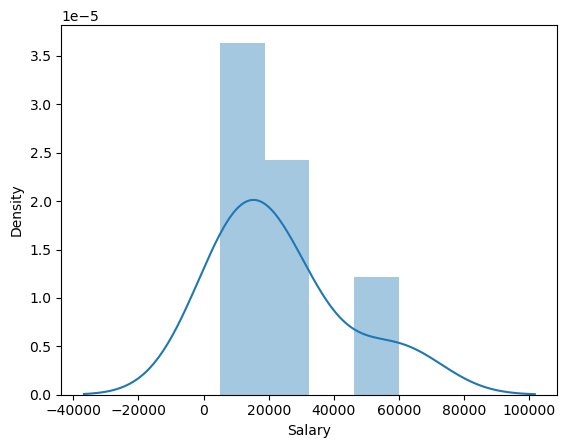

In [158]:
vis1 = sns.distplot(clean_data['Salary'])

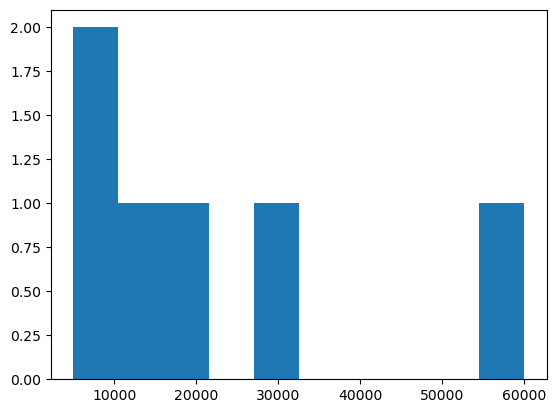

In [186]:
vis2 = plt.hist(clean_data['Salary'])

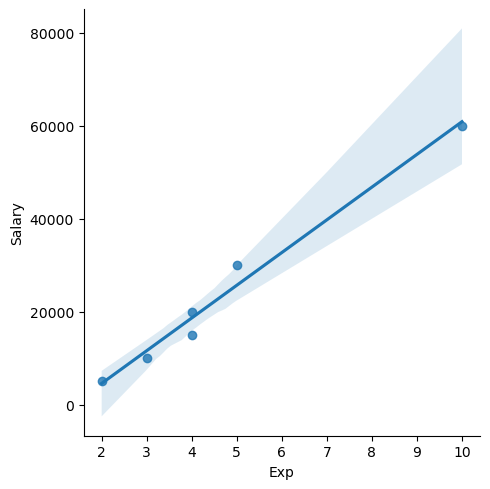

In [188]:
vis4 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary')

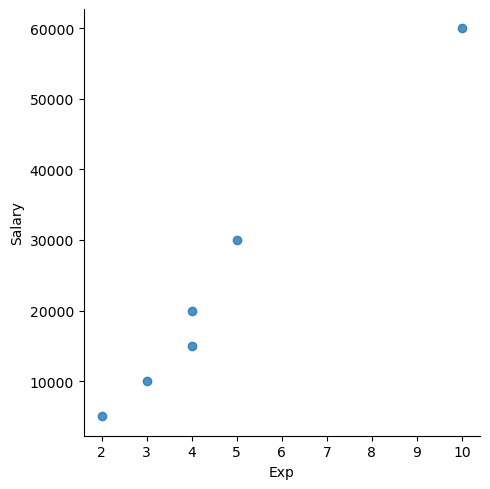

In [190]:
vis5 = sns.lmplot(data = clean_data, x = 'Exp', y = 'Salary', fit_reg = False)

In [192]:
clean_data[:]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [194]:
clean_data[0:6:2]

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
2,Umar,Dataanalyst,50,Bangalore,15000,4
4,Uttam,Statistics,67,Bangalore,30000,5


In [196]:
clean_data[::-1]

,Name,Domain,Age,Location,Salary,Exp
5,Kim,NLP,55,Delhi,60000,10
4,Uttam,Statistics,67,Bangalore,30000,5
3,Jane,Analytics,50,Hyderbad,20000,4
2,Umar,Dataanalyst,50,Bangalore,15000,4
1,Teddy,Testing,45,Bangalore,10000,3
0,Mike,Datascience,34,Mumbai,5000,2


In [198]:
clean_data.columns

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')

In [218]:
X_iv = clean_data[['Name','Domain','Age','Location','Exp']]
# storing independent variable in X_iv

In [220]:
X_iv

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [222]:
Y_dv = clean_data[['Salary']]
# storing dependent variable in Y_dv

In [224]:
Y_dv

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [228]:
emp
# in emp variable we have missing NaN values

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5^00#0,2+
1,Teddy,Testing,45,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67,NaN,30000-,5+ year
5,Kim,NLP,55,Delhi,6000^$0,10+


In [230]:
clean_data
# here we have dataset cleaned by us

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,50,Bangalore,15000,4
3,Jane,Analytics,50,Hyderbad,20000,4
4,Uttam,Statistics,67,Bangalore,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [232]:
X_iv
# here we have independent variables

,Name,Domain,Age,Location,Exp
0,Mike,Datascience,34,Mumbai,2
1,Teddy,Testing,45,Bangalore,3
2,Umar,Dataanalyst,50,Bangalore,4
3,Jane,Analytics,50,Hyderbad,4
4,Uttam,Statistics,67,Bangalore,5
5,Kim,NLP,55,Delhi,10


In [234]:
Y_dv
# here we have dependent variables

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


## Transformers technique

### **Applying imputation technique**

In [250]:
imputation = pd.get_dummies(clean_data,dtype = int)
# here dummy variables are generated
# imputation is required to represent each data in dataframes to binary 0 or 1 to help machine understand them.

In [252]:
imputation

,Age,Salary,Exp,Name_Jane,Name_Kim,Name_Mike,Name_Teddy,Name_Umar,Name_Uttam,Domain_Analytics,Domain_Dataanalyst,Domain_Datascience,Domain_NLP,Domain_Statistics,Domain_Testing,Location_Bangalore,Location_Delhi,Location_Hyderbad,Location_Mumbai
0,34,5000,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,45,10000,3,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0
2,50,15000,4,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,50,20000,4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,67,30000,5,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
5,55,60000,10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0


**We feed this data stored in imputation in machine while doing ML**